# Check target switching after buzz onset

This notebook checks whether the animal always returned to regular clicks and re-entered the buzz phase when switching target.

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd

import pickle

In [2]:
from pp_utils.core import generate_data_path_dict, MISC_PARAMS
from pp_utils.file_handling import df_main_loader

## Set paths and load main info df

In [3]:
data_path = generate_data_path_dict(Path("../data_processed/"))
raw_path = Path("../data_raw/")

### Data and figure path

In [4]:
output_path = data_path["main"] / "data_summary"

tp_path = output_path / "trial_processor_object"  # TrialProcessor objects

### Load main dataframe

In [5]:
df_main = df_main_loader(
    folder=data_path["info_csv"], filename="main_info_append_09.csv",
)

In [6]:
df_summary = pd.read_csv(output_path / "data_summary_all.csv", index_col=0)

## Plot ICI for all trials with buzz onset BEFORE decision

In [7]:
df_sel_buzz_before_decision = df_summary[
    df_summary["time_buzz_onset_clean"] < df_summary["time_decision"]
]

In [8]:
df_sel_buzz_before_decision

,scan_ch0,scan_ch1,scan_combined,time_decision,time_buzz_onset_dtag,time_buzz_onset_hydro,time_touch,time_last_nonchosen,range_decision_tar,range_buzz_onset_dtag_tar,...,CHOICE,TARGET_ANGLE,fname_prefix,TRIAL_TO_INCLUDE,time_buzz_onset_clean,time_decision2touch,time_buzz2touch,range_buzz_onset_tar_clean,range_buzz_onset_clu_clean,range_buzz_onset_closest
73,7.0,6.0,11.0,1548.684214,1548.050946,1548.086306,1551.914769,0.793518,1.362124,1.540649,...,1,CT2,20190627_s2_t7,Y,1548.050946,3.230555,3.863823,1.540649,1.269275,1.269275
78,7.0,7.0,12.0,711.551554,710.430021,710.431456,715.280420,1.247078,1.093745,1.240900,...,1,TC1,20190627_s3_t1,Y,710.430021,3.728866,4.850399,1.240900,0.962024,0.962024
92,6.0,6.0,11.0,1012.773915,1012.189570,1012.192045,1015.613447,1.423826,1.283514,1.631043,...,1,TC3,20190628_s1_t4,Y,1012.192045,2.839532,3.421402,1.629222,1.200666,1.200666
94,5.0,4.0,8.0,1108.026351,1107.027454,1106.688969,1109.341139,1.981924,1.494373,1.710489,...,1,CT2,20190628_s1_t6,Y,1106.688969,1.314789,2.652171,1.759241,1.195008,1.195008
98,6.0,6.0,10.0,1317.982318,1316.262093,1316.087340,1320.318469,2.386198,1.339563,1.677424,...,1,CT2,20190628_s1_t10,Y,1316.087340,2.336151,4.231129,1.724309,1.342942,1.342942
103,7.0,10.0,14.0,959.795439,958.185764,959.081601,961.825174,0.812402,0.869696,1.073409,...,0,TC1,20190628_s2_t5,Y,958.185764,2.029735,3.639410,1.073409,0.934852,0.934852
122,7.0,6.0,11.0,1066.673911,1065.901982,1065.903759,1070.367857,1.208746,1.374224,1.873570,...,1,TC2,20190701_s1_t2,Y,1065.901982,3.693946,4.465875,1.873570,1.235041,1.235041
129,3.0,3.0,6.0,1529.044347,1527.831991,1527.821865,1531.694290,2.783156,0.887462,1.294671,...,1,TC3,20190701_s1_t9,Y,1527.821865,2.649943,3.872425,1.306821,1.068208,1.068208
161,5.0,5.0,9.0,1081.436671,1080.836746,1080.863067,1084.081286,0.722478,1.154622,1.533768,...,1,TC4,20190702_s1_t10,Y,1080.836746,2.644615,3.244540,1.533768,0.990227,0.990227
182,6.0,5.0,10.0,1097.789983,1096.947467,1096.735189,1101.533444,1.170276,1.396037,1.458839,...,1,CT2,20190702_s3_t10,Y,1096.735189,3.743461,4.798255,1.442693,1.150435,1.150435


----------------------------------
trial 73: 20190627_s2_t7


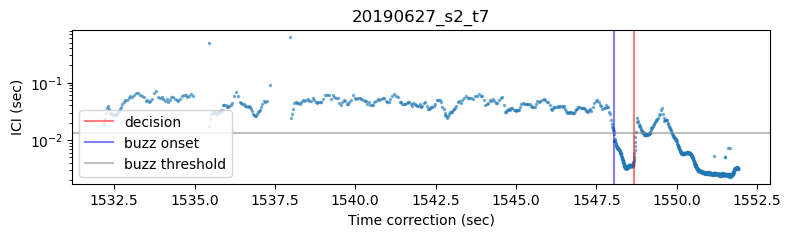

----------------------------------
trial 78: 20190627_s3_t1


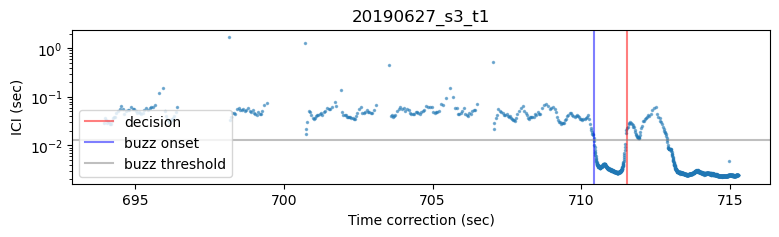

----------------------------------
trial 92: 20190628_s1_t4


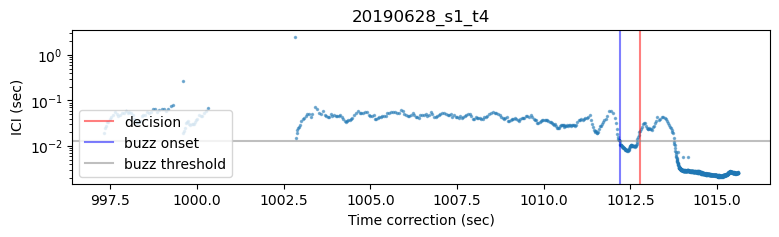

----------------------------------
trial 94: 20190628_s1_t6


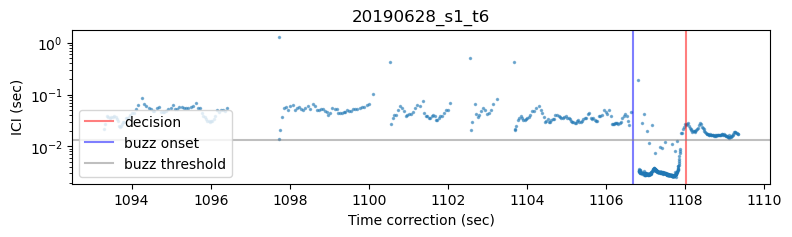

----------------------------------
trial 98: 20190628_s1_t10


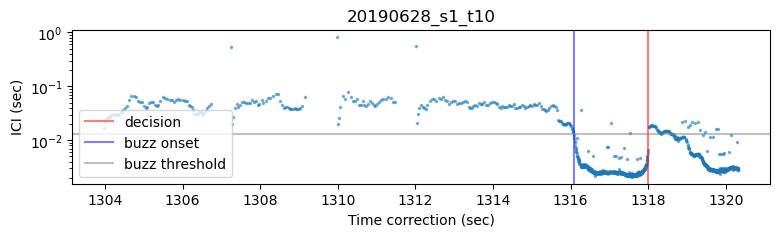

----------------------------------
trial 103: 20190628_s2_t5


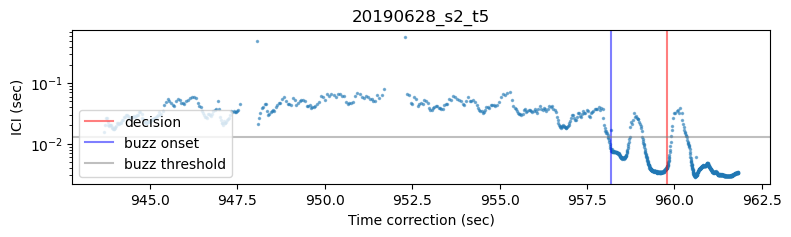

----------------------------------
trial 122: 20190701_s1_t2


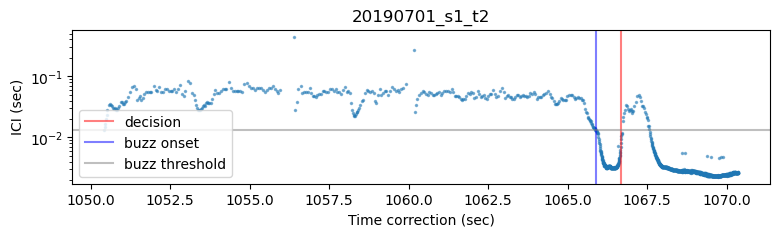

----------------------------------
trial 129: 20190701_s1_t9


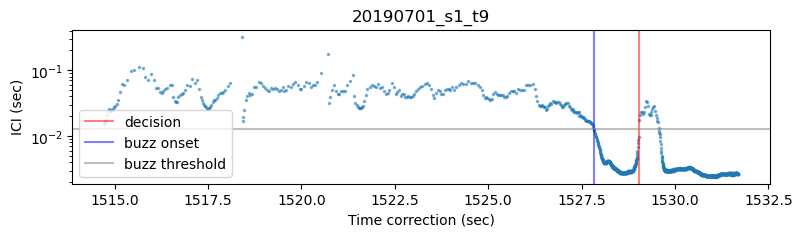

----------------------------------
trial 161: 20190702_s1_t10


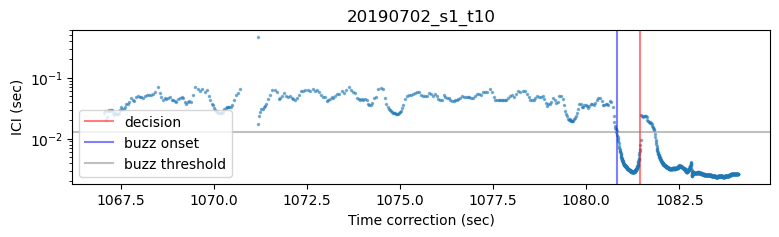

----------------------------------
trial 182: 20190702_s3_t10


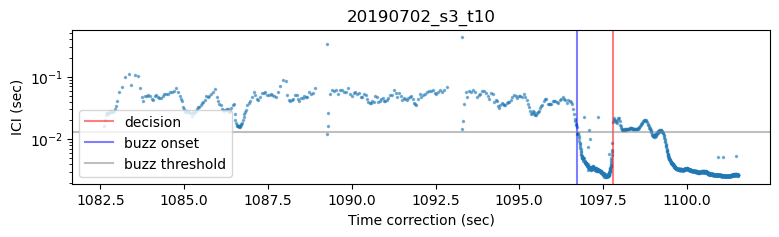

----------------------------------
trial 188: 20190703_s1_t6


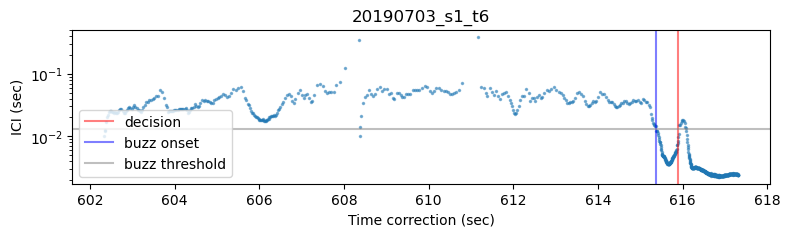

----------------------------------
trial 196: 20190703_s2_t4


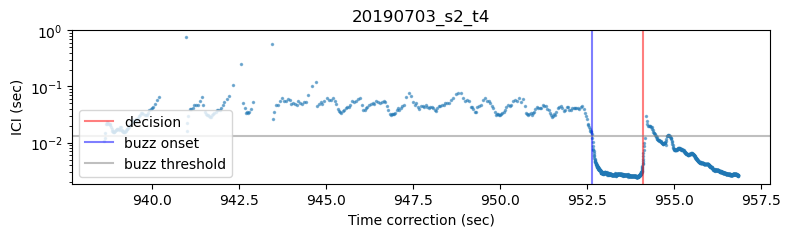

----------------------------------
trial 197: 20190703_s2_t5


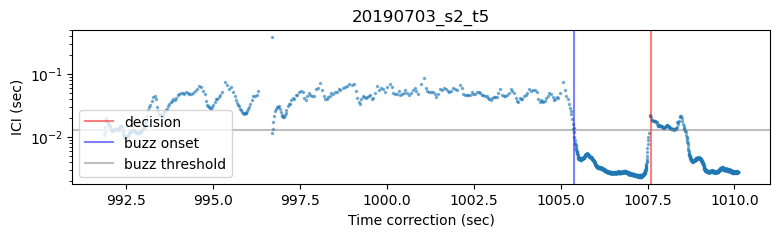

----------------------------------
trial 200: 20190703_s2_t8


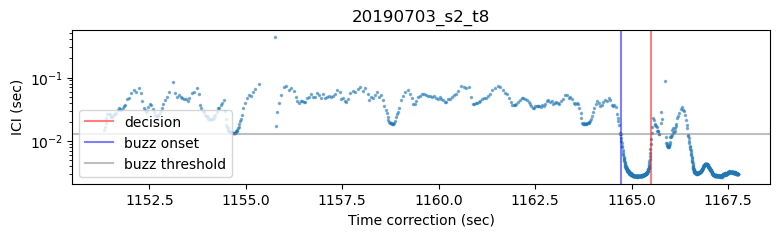

----------------------------------
trial 201: 20190703_s2_t9


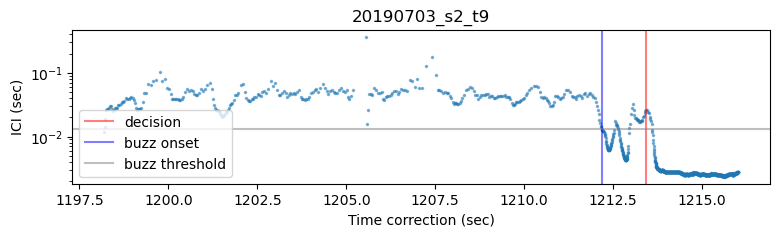

----------------------------------
trial 219: 20190704_s1_t6


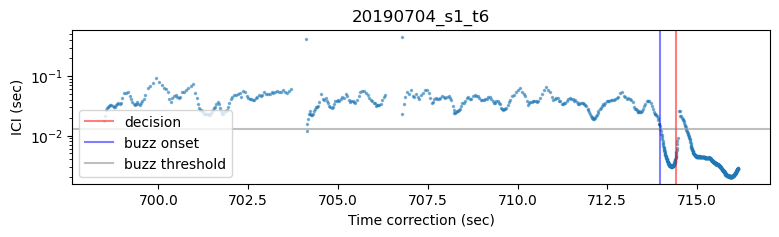

----------------------------------
trial 239: 20190704_s3_t5


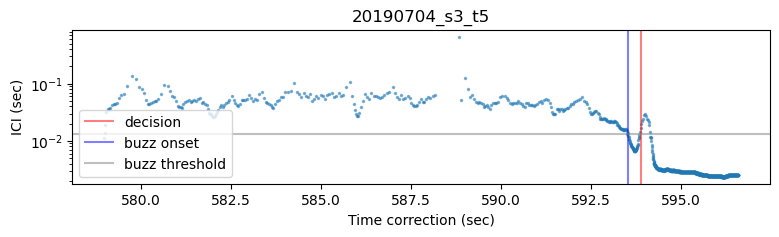

In [9]:
for trial_idx in df_sel_buzz_before_decision.index:

    fname_prefix = df_sel_buzz_before_decision.loc[trial_idx]["fname_prefix"]
    print("----------------------------------")
    print(f"trial {trial_idx}: {fname_prefix}")

    # Load TrialProcessor object
    tp_obj_fname = tp_path / f"trial_{trial_idx:03d}.pickle"
    with open(tp_obj_fname, "rb") as filein:
        tp = pickle.load(filein)

        df_dtag_plot = tp.df_dtag[tp.df_dtag["before_touch"]].copy()
        df_dtag_plot["ICI"] = df_dtag_plot["time_corrected"].diff()

    # Plot Dtag ICI
    fig, ax = plt.subplots(1, 1, figsize=(9, 2))
    ax.plot(df_dtag_plot["time_corrected"], df_dtag_plot["ICI"],
            marker=".", ls="", markersize=3, alpha=0.5)
    ax.axvline(df_sel_buzz_before_decision.loc[trial_idx]["time_decision"],
               color="r", label="decision", alpha=0.5)
    ax.axvline(df_sel_buzz_before_decision.loc[trial_idx]["time_buzz_onset_clean"],
               color="b", label="buzz onset", alpha=0.5)
    ax.axhline(MISC_PARAMS["buzz_reg_switch"],
               color="grey", label="buzz threshold", alpha=0.5)
    ax.set_yscale("log")
    ax.set_xlabel("Time correction (sec)")
    ax.set_ylabel("ICI (sec)")
    ax.legend(fontsize=10, loc="lower left")
    ax.set_title(fname_prefix)

    plt.show()